## panels for fig 1 

#### Figure Purpose: Give readers enough information about the dataset as a glance to decide if it is of interest to them. 

* electrode localizations
* unit distribution across patients, stratified by region
* overall unit information
* general stimulus information

In [34]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', )))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from collections import Counter
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

from config_colors import *
from config_paths import *
from config_plot_params import *
from nwb_io import *

from nilearn.plotting import plot_markers

# save panels directly to the relevant svg/ subdir
panel_save_dir = Path.cwd().parent.parent / "figure_generation" / "figure_data_overview" / "svg"

data_dir = NWB_data_dir

In [3]:
path = Path("/media/al/Seagate/movies_dataset_nwb/sub14.nwb")
io = NWBHDF5IO(path, mode="r")
nwbfile = io.read()

In [6]:
## collect all units from all nwb files

i = 0 

for path in tqdm(list(data_dir.glob("*.nwb"))):
    print(path)
    if path.is_dir():
        continue 

    patient_id = int(path.name.split(".")[0][3:])
    print(f"  {patient_id}")
    io = NWBHDF5IO(path, mode="r")
    nwbfile = io.read()

    df_units = nwbfile.units.to_dataframe()
    df_units["unit_id"] = np.arange(0, len(df_units))

    df_units.insert(0, "patient_id", [patient_id] * len(df_units), )
    
    if i == 0:
        df_units_all = df_units.copy()
    else:
        df_units_all = pd.concat([df_units_all, df_units], ignore_index=True)
    
    io.close()
    i += 1

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/sub14.nwb
  14


  3%|▎         | 1/29 [00:08<04:00,  8.60s/it]

/media/al/Seagate/movies_dataset_nwb/sub52.nwb
  52


  7%|▋         | 2/29 [01:05<16:37, 36.95s/it]

/media/al/Seagate/movies_dataset_nwb/sub53.nwb
  53


 10%|█         | 3/29 [01:12<10:02, 23.16s/it]

/media/al/Seagate/movies_dataset_nwb/sub60.nwb
  60


 14%|█▍        | 4/29 [01:38<10:15, 24.60s/it]

/media/al/Seagate/movies_dataset_nwb/sub61.nwb
  61


 17%|█▋        | 5/29 [02:13<11:14, 28.12s/it]

/media/al/Seagate/movies_dataset_nwb/sub64.nwb
  64


 21%|██        | 6/29 [02:46<11:28, 29.94s/it]

/media/al/Seagate/movies_dataset_nwb/sub65.nwb
  65


 24%|██▍       | 7/29 [02:58<08:49, 24.05s/it]

/media/al/Seagate/movies_dataset_nwb/sub66.nwb
  66


 28%|██▊       | 8/29 [03:33<09:37, 27.50s/it]

/media/al/Seagate/movies_dataset_nwb/sub68.nwb
  68


 31%|███       | 9/29 [05:27<18:07, 54.37s/it]

/media/al/Seagate/movies_dataset_nwb/sub88.nwb
  88


 34%|███▍      | 10/29 [05:45<13:43, 43.35s/it]

/media/al/Seagate/movies_dataset_nwb/sub89.nwb
  89


 38%|███▊      | 11/29 [06:11<11:23, 37.96s/it]

/media/al/Seagate/movies_dataset_nwb/sub90.nwb
  90


 41%|████▏     | 12/29 [06:30<09:09, 32.35s/it]

/media/al/Seagate/movies_dataset_nwb/sub92.nwb
  92


 45%|████▍     | 13/29 [07:56<12:57, 48.59s/it]

/media/al/Seagate/movies_dataset_nwb/sub20.nwb
  20


 48%|████▊     | 14/29 [08:17<10:01, 40.10s/it]

/media/al/Seagate/movies_dataset_nwb/sub23.nwb
  23


 52%|█████▏    | 15/29 [08:42<08:17, 35.54s/it]

/media/al/Seagate/movies_dataset_nwb/sub28.nwb
  28


 55%|█████▌    | 16/29 [10:19<11:44, 54.20s/it]

/media/al/Seagate/movies_dataset_nwb/sub30.nwb
  30


 59%|█████▊    | 17/29 [11:04<10:16, 51.41s/it]

/media/al/Seagate/movies_dataset_nwb/sub96.nwb
  96


 62%|██████▏   | 18/29 [12:20<10:45, 58.69s/it]

/media/al/Seagate/movies_dataset_nwb/sub33.nwb
  33


 66%|██████▌   | 19/29 [13:29<10:18, 61.87s/it]

/media/al/Seagate/movies_dataset_nwb/sub39.nwb
  39


 69%|██████▉   | 20/29 [13:43<07:06, 47.42s/it]

/media/al/Seagate/movies_dataset_nwb/sub41.nwb
  41


 72%|███████▏  | 21/29 [14:00<05:05, 38.18s/it]

/media/al/Seagate/movies_dataset_nwb/sub42.nwb
  42


 76%|███████▌  | 22/29 [15:32<06:21, 54.45s/it]

/media/al/Seagate/movies_dataset_nwb/sub44.nwb
  44


 79%|███████▉  | 23/29 [15:47<04:16, 42.68s/it]

/media/al/Seagate/movies_dataset_nwb/sub98.nwb
  98


 83%|████████▎ | 24/29 [15:56<02:42, 32.42s/it]

/media/al/Seagate/movies_dataset_nwb/sub31.nwb
  31


 86%|████████▌ | 25/29 [16:56<02:43, 40.92s/it]

/media/al/Seagate/movies_dataset_nwb/sub73.nwb
  73


 90%|████████▉ | 26/29 [18:02<02:25, 48.37s/it]

/media/al/Seagate/movies_dataset_nwb/sub83.nwb
  83


 93%|█████████▎| 27/29 [18:57<01:40, 50.42s/it]

/media/al/Seagate/movies_dataset_nwb/sub87.nwb
  87


 97%|█████████▋| 28/29 [19:22<00:42, 42.65s/it]

/media/al/Seagate/movies_dataset_nwb/sub50.nwb
  50


100%|██████████| 29/29 [19:42<00:00, 40.77s/it]


In [7]:
raw_regions = df_units_all["brain_region"]

raw_regions = [r for r in raw_regions if r not in ["H", "T", "Ta", "Tb", "I"]]
units_regions = pd.Series(raw_regions).replace("AH","H").replace("MH", "H").replace("PH", "H").replace("APH","PHC").replace("MPH","PHC").replace("PPH","PHC")
data = Counter(units_regions)

## raster plot

In [30]:
pat = 42
spikes = df_units_all[df_units_all["patient_id"] == pat]["spike_times"]
spikes = np.array(spikes)

In [31]:
minutes = 10
time_limit = minutes * 60 * 1000 

data = []
for unit in spikes:
    unit_ = []
    for s in unit:
        #if s >= onset and s <= offset:
        if s <= time_limit:
            unit_.append(s)
            
    data.append(np.array(unit_))

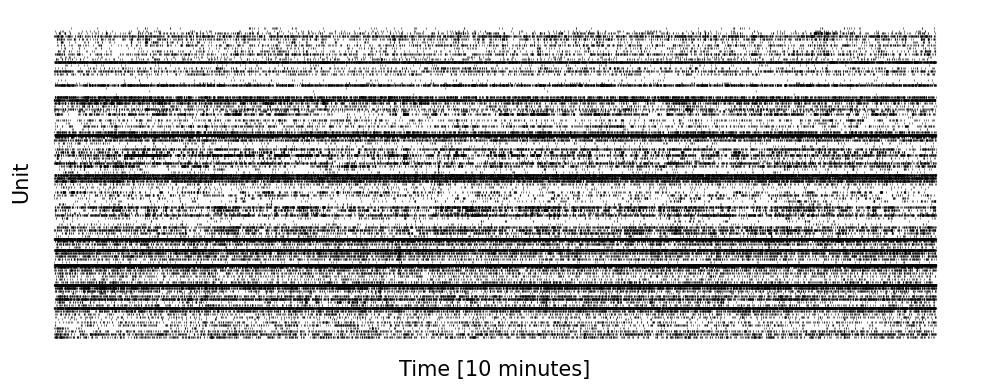

In [44]:
ticklabelsize = 20
axislabelsize = 38

fig, ax = plt.subplots(1, 1, figsize=(10,4))

ax.eventplot(data, linewidths=0.8, linelengths=.7, color='black', alpha=0.5)
ax.invert_yaxis()
ax.set_yticks([])
ax.set_yticklabels([])
ax.yaxis.set_ticks_position('none') 

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel("Time [10 minutes]", fontsize=labelsize)
ax.set_ylabel("Unit", fontsize=labelsize, labelpad=-15)

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig(panel_save_dir / "raster.png", bbox_inches="tight", dpi=300)
#plt.savefig(panel_save_dir / "raster.svg", bbox_inches="tight", dpi=300)

plt.show()

## electrode localizations

In [45]:
i = 0 

for path in tqdm(list(data_dir.glob("*.nwb"))):
    print(path)
    if path.is_dir():
        continue 

    patient_id = int(path.name.split(".")[0][3:])
    print(f"  {patient_id}")
    io = NWBHDF5IO(path, mode="r")
    nwbfile = io.read()

    df_electrodes = nwbfile.electrodes.to_dataframe()
    df_electrodes.insert(0, "patient_id", [patient_id] * len(df_electrodes))
    
    if i == 0:
        df_electrodes_all = df_electrodes.copy()
    else:
        df_electrodes_all = pd.concat([df_electrodes_all, df_electrodes], ignore_index=True)
    
    io.close()
    i += 1

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/sub14.nwb
  14


  3%|▎         | 1/29 [00:01<00:44,  1.59s/it]

/media/al/Seagate/movies_dataset_nwb/sub52.nwb
  52


  7%|▋         | 2/29 [00:05<01:15,  2.80s/it]

/media/al/Seagate/movies_dataset_nwb/sub53.nwb
  53


 10%|█         | 3/29 [00:09<01:34,  3.62s/it]

/media/al/Seagate/movies_dataset_nwb/sub60.nwb
  60


 14%|█▍        | 4/29 [00:13<01:33,  3.72s/it]

/media/al/Seagate/movies_dataset_nwb/sub61.nwb
  61


 17%|█▋        | 5/29 [00:16<01:23,  3.48s/it]

/media/al/Seagate/movies_dataset_nwb/sub64.nwb
  64


 21%|██        | 6/29 [00:22<01:38,  4.28s/it]

/media/al/Seagate/movies_dataset_nwb/sub65.nwb
  65


 24%|██▍       | 7/29 [00:28<01:43,  4.69s/it]

/media/al/Seagate/movies_dataset_nwb/sub66.nwb
  66


 28%|██▊       | 8/29 [00:32<01:33,  4.46s/it]

/media/al/Seagate/movies_dataset_nwb/sub68.nwb
  68


 31%|███       | 9/29 [00:34<01:15,  3.76s/it]

/media/al/Seagate/movies_dataset_nwb/sub88.nwb
  88


 34%|███▍      | 10/29 [00:36<01:04,  3.42s/it]

/media/al/Seagate/movies_dataset_nwb/sub89.nwb
  89


 38%|███▊      | 11/29 [00:39<00:59,  3.29s/it]

/media/al/Seagate/movies_dataset_nwb/sub90.nwb
  90


 41%|████▏     | 12/29 [00:42<00:53,  3.15s/it]

/media/al/Seagate/movies_dataset_nwb/sub92.nwb
  92


 45%|████▍     | 13/29 [00:45<00:46,  2.88s/it]

/media/al/Seagate/movies_dataset_nwb/sub20.nwb
  20


 48%|████▊     | 14/29 [00:47<00:41,  2.74s/it]

/media/al/Seagate/movies_dataset_nwb/sub23.nwb
  23


 52%|█████▏    | 15/29 [00:50<00:38,  2.74s/it]

/media/al/Seagate/movies_dataset_nwb/sub28.nwb
  28


 55%|█████▌    | 16/29 [00:52<00:33,  2.57s/it]

/media/al/Seagate/movies_dataset_nwb/sub30.nwb
  30


 59%|█████▊    | 17/29 [00:54<00:30,  2.51s/it]

/media/al/Seagate/movies_dataset_nwb/sub96.nwb
  96


 62%|██████▏   | 18/29 [00:57<00:26,  2.44s/it]

/media/al/Seagate/movies_dataset_nwb/sub33.nwb
  33


 66%|██████▌   | 19/29 [00:59<00:23,  2.40s/it]

/media/al/Seagate/movies_dataset_nwb/sub39.nwb
  39


 69%|██████▉   | 20/29 [01:01<00:21,  2.38s/it]

/media/al/Seagate/movies_dataset_nwb/sub41.nwb
  41


 72%|███████▏  | 21/29 [01:03<00:17,  2.23s/it]

/media/al/Seagate/movies_dataset_nwb/sub42.nwb
  42


 76%|███████▌  | 22/29 [01:05<00:15,  2.25s/it]

/media/al/Seagate/movies_dataset_nwb/sub44.nwb
  44


 79%|███████▉  | 23/29 [01:08<00:13,  2.30s/it]

/media/al/Seagate/movies_dataset_nwb/sub98.nwb
  98


 83%|████████▎ | 24/29 [01:10<00:11,  2.35s/it]

/media/al/Seagate/movies_dataset_nwb/sub31.nwb
  31


 86%|████████▌ | 25/29 [01:13<00:09,  2.37s/it]

/media/al/Seagate/movies_dataset_nwb/sub73.nwb
  73


 90%|████████▉ | 26/29 [01:15<00:06,  2.33s/it]

/media/al/Seagate/movies_dataset_nwb/sub83.nwb
  83


 93%|█████████▎| 27/29 [01:17<00:04,  2.37s/it]

/media/al/Seagate/movies_dataset_nwb/sub87.nwb
  87


 97%|█████████▋| 28/29 [01:21<00:02,  2.65s/it]

/media/al/Seagate/movies_dataset_nwb/sub50.nwb
  50


100%|██████████| 29/29 [01:25<00:00,  2.94s/it]


In [52]:
node_coords = []
for i, row in df_electrodes_all.iterrows():
    node_coords.append(np.array([row.x, row.y, row.z]))

region_map = {
    "PIC": 1,
    "A": 2,
    "AH": 3,
    "MH": 3,
    "PH": 3, 
    "EC": 4,
    "PHC": 5,
    "APH": 5, 
    "MPH": 5, 
    "PPH": 5,
    "FF": 6,
    "LG": 7,
    "PRC": 8
}

node_values = [region_map[r]+(np.random.random()) for r in df_electrodes_all['brain_region']]


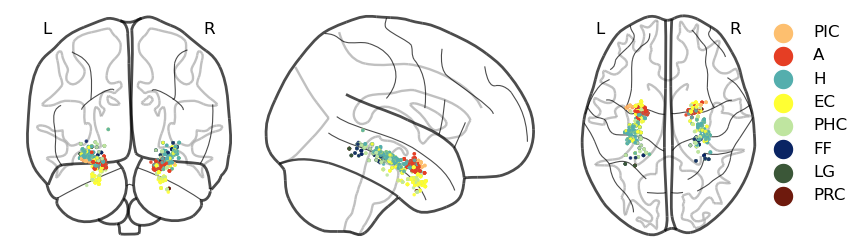

In [56]:
from matplotlib.colors import ListedColormap

colors = [
    '#fdbf6f',
    '#E53E24', 
    '#54aead', 
    '#FFFF33', 
    '#bfe5a0', 
    '#0A2463',
    '#3B5738',
    '#6E1A0D',

]

#cmap=sns.color_palette("Spectral", as_cmap=True)
cmap= ListedColormap(colors, name='brain_v2')
#plt.style.use('dark_background')
fig, ax = plt.subplots(1,1, figsize=(10,3))

node_size = 2.5
alpha = 0.8

plot_markers(
    node_values,    
    node_coords,     
    node_size=node_size,
    node_cmap=cmap,
    alpha=alpha,
    figure=fig,
    axes=ax,
    colorbar=False,
    black_bg=False,
)

norm = plt.Normalize(vmin=min(node_values), vmax=max(node_values))

handles = []
for region, value in region_map.items():
    if region in ["AH"]:
        region = "H"
        value = region_map["AH"]
    elif region in ["MH", "PH"]:
        continue

    if region in ["PHC"]:
        region = "PHC"
        value = region_map["PHC"]
    elif region in ["APH", "MPH", "PPH"]:
        continue

    color = cmap(norm(value))
    handle = plt.scatter([], [], color=color, s=100, label=region, edgecolor='w')    
    handles.append(handle)

ax.legend(handles=handles, title="", markerscale=1.5, bbox_to_anchor=(1.1, 1), fontsize=12, frameon=False)

plt.savefig(panel_save_dir / "localizations.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "localizations.svg", bbox_inches="tight", dpi=300)
plt.show()

## units across regions

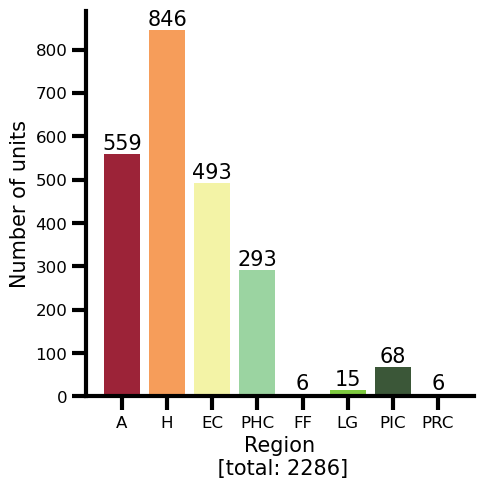

In [ ]:
rc('axes', linewidth=axwidth)
rc('xtick.major', width=tickwidth, size=ticksize)
rc('xtick', labelsize=ticklabelsize)        
rc('ytick.major', width=tickwidth, size=ticksize)
rc('ytick', labelsize=ticklabelsize)

colors = [
    "#9c2338", "#f69d5a",  "#f3f3a6", "#9bd4a1", "#486198", 
    '#7ECA3F',
    '#3B5738',
    '#6E1A0D',  
]

fig, ax = plt.subplots(1,1, figsize=(5,5))
bars = ax.bar(data.keys(), data.values(), color=colors)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5,  # Adjust vertical position
            f'{int(height)}', ha='center', va='bottom', fontsize=labelsize)

ax.set_xlabel(f"Region\n [total: {len(units_regions)}]", fontsize=labelsize)
ax.set_ylabel("Number of units", fontsize=labelsize)

sns.despine()

plt.tight_layout()
plt.savefig(panel_save_dir / "units_by_region.png", bbox_inches="tight", dpi=300)
plt.savefig(panel_save_dir / "units_by_region.svg", bbox_inches="tight", dpi=300)
plt.show()


## units across patient, stratified by regions